# Network Selection

This notebook provides a more in-depth look at selecting the optimal network for MintPy SBAS analysis

In [2]:
# %matplotlib widget
%matplotlib inline
import glob
import sys
import shutil
import os
import matplotlib.pyplot as plt
from mintpy.utils import readfile
from mintpy import workflow, view, tsview, plot_network, plot_transection, plot_coherence_matrix
from mintpy.unwrap_error_phase_closure import plot_num_triplet_with_nonzero_integer_ambiguity

In [7]:
cd /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy

/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2


view.py ./inputs/ifgramStack.h5 unwrapPhase -m waterMask.h5 --vlim -20 20 --noverbose -o ifg_0550201_02.png


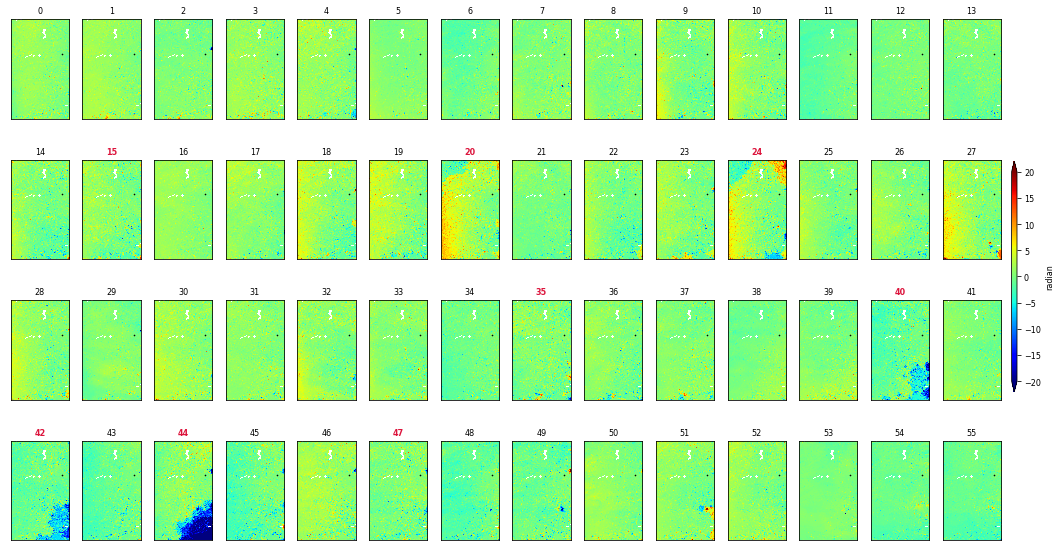

In [8]:
view.main('./inputs/ifgramStack.h5 unwrapPhase -m waterMask.h5 --vlim -20 20 --noverbose -o ifg_0550201_02.png'.split())

In [4]:
!spatial_average.py inputs/ifgramStack.h5 -d unwrapPhase -m waterMask.h5


*************** Spatial Average ******************
calculating spatial mean of unwrapPhase in file inputs/ifgramStack.h5 ...
read mask from file: waterMask.h5
[==================================================] 56/56   28s /     0s 
write average value in space into text file: unwrapPhaseSpatialAvg.txt


In [5]:
cat unwrapPhaseSpatialAvg.txt

# Data file: ifgramStack.h5
# Mask file: waterMask.h5
# AOI box: (0, 0, 4892, 8333)
# Threshold: None
#	DATE12		Mean	Btemp/days	Bperp/m		Num
20090220_20091119	3.7749	     272	     0.0	0
20090220_20100115	3.3518	     329	     0.0	1
20090220_20100301	2.3133	     374	     0.0	2
20090220_20100423	-3.7466	     427	     0.0	3
20090220_20101110	1.9995	     628	     0.0	4
20091119_20100115	-0.4428	      57	     0.0	5
20091119_20100301	4.8208	     102	     0.0	6
20091119_20100423	-1.1257	     155	     0.0	7
20091119_20101110	-1.4982	     356	     0.0	8
20091119_20110712	-1.9018	     600	     0.0	9
20091119_20111103	-0.5087	     714	     0.0	10
20100115_20100301	5.3307	      45	     0.0	11
20100115_20100423	-0.6709	      98	     0.0	12
20100115_20101110	-1.1054	     299	     0.0	13
20100115_20110712	4.8490	     543	     0.0	14
20100115_20111103	12.5658	     657	     0.0	15
20100301_20100423	6.6008	      53	     0.0	16
20100301_20101110	-0.1219	     254	     0.0	17
20100301_20110712	5.9033	     4

In [7]:
data1, atr = readfile.read('../Igrams/20100423_20120413/filt_20100423_20120413_snaphu.unw')
data2, atr = readfile.read('../Igrams/20140528_20160324/filt_20140528_20160324_snaphu.unw')
print(data1.mean(),data2.mean())

-1.3845944 2.9161847


There are one or two interferograms with large phase differences, but for now let's just remove interferograms with phase discontinuities [20,24,40,42,44].

read options from template file: Haywrd_05502_01-S2.cfg
read temporal/spatial baseline info from file: ./inputs/ifgramStack.h5
calculating spatial mean of coherence in file ./inputs/ifgramStack.h5 ...
read mask from file: waterMask.h5
[==================================================] 56/56   30s /     0s 
write average value in space into text file: coherenceSpatialAvg.txt
number of acquisitions: 20
number of interferograms: 56
shift all perp baseline by 0.0 to zero mean for plotting
--------------------------------------------------
number of interferograms marked as drop: 8
number of interferograms marked as keep: 48
number of acquisitions marked as drop: 0


/home/fwilliam/tools/MintPy/mintpy/utils/plot.py:464: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([ymin, ymax])


save figure to bperpHistory.pdf
save figure to coherenceMatrix.pdf
save figure to coherenceHistory.pdf
max perpendicular baseline: 0.00 m
max temporal      baseline: 798.0 days
showing coherence
data range: [0.37365875, 0.8493659]
display range: (0.2, 1.0)


/home/fwilliam/tools/MintPy/mintpy/utils/plot.py:464: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([ymin, ymax])


save figure to network.pdf
showing ...


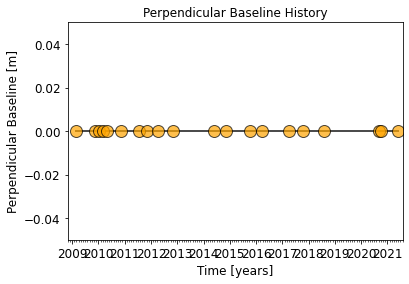

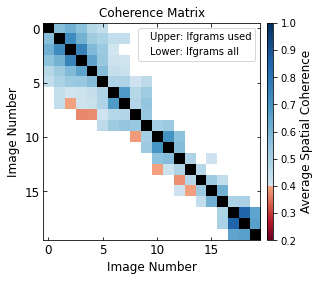

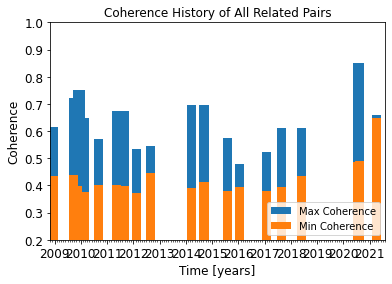

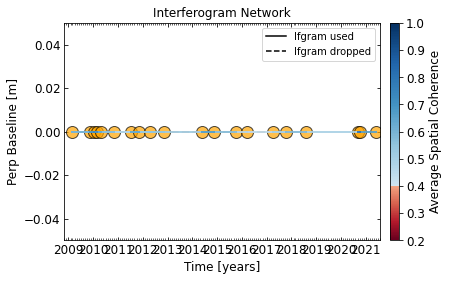

In [10]:
plot_network.main('./inputs/ifgramStack.h5 -t ../JPL_internship/Haywrd_05502_01-S2.cfg --save'.split())

Dropped 5 of 56 interferograms, but still have fully connected network with avgSpatialCoh > 0.4 threshold. In fact, all interferograms had avgSpatialCoh values that were greater than 0.4

In [11]:
cat coherenceSpatialAvg.txt

# Data file: ifgramStack.h5
# Mask file: waterMask.h5
# AOI box: (0, 0, 4892, 8333)
# Threshold: None
#	DATE12		Mean	Btemp/days	Bperp/m		Num
20090220_20091119	0.5695	     272	     0.0	0
20090220_20100115	0.6133	     329	     0.0	1
20090220_20100301	0.5552	     374	     0.0	2
20090220_20100423	0.4630	     427	     0.0	3
20090220_20101110	0.4350	     628	     0.0	4
20091119_20100115	0.7225	      57	     0.0	5
20091119_20100301	0.6023	     102	     0.0	6
20091119_20100423	0.5166	     155	     0.0	7
20091119_20101110	0.4892	     356	     0.0	8
20091119_20110712	0.4372	     600	     0.0	9
20091119_20111103	0.4368	     714	     0.0	10
20100115_20100301	0.7522	      45	     0.0	11
20100115_20100423	0.5813	      98	     0.0	12
20100115_20101110	0.5286	     299	     0.0	13
20100115_20110712	0.4020	     543	     0.0	14
20100115_20111103	0.3965	     657	     0.0	15
20100301_20100423	0.6464	      53	     0.0	16
20100301_20101110	0.5337	     254	     0.0	17
20100301_20110712	0.4127	     498	     0.